# Statistical Distributions ToolKit
** **
 - A tool to model statistical distributions
   - Discrete Distributions:
     * Bernoulli
     * Binomial
     * Multinomial
     * Geometry
     * Poisson
   - Continuous Disributions:
     * Gaussian
     * Exponential
     * Erlang
 

In [1]:
# importing necessary libraries
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

#####   
# Bernoulli Distribution
** **
 - A **Discrete** Probability Distribution
** **
 - A **Bernoulli distribution** summarizes 
   - the percent of failure & success
   - in one Bernoulli trial
   - with the probability of success of p ( & failure of 1-p ).
** **
 - A **Bernoulli trial** is an experiment where the outcome follows a **Bernoulli distribution.**
** **
 - A common example of a **Bernoulli trial** in **machine learning** might be:
   - a binary classification of a single example as the first class (0) or the second class (1).
** **
 - P(x=1) = p
 - P(x=0) = 1 – p

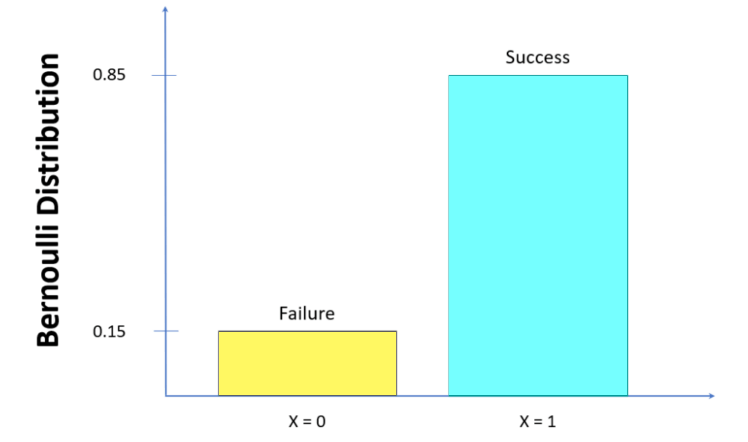

# Binomial Distribution
** **
 - A **Discrete** Probability Distribution
 - A **Bernoulli Process** is the **repetition** of multiple independent **Bernoulli trials.**
 - A **Binomial Distribution** summarizes 
   - the number of successes 
   - in a **Bernoulli Process** with a given number of Bernoulli trials, k, 
   - with a given probability of success for each trial, p.
** **
 - Some common examples of Bernoulli processes include:
   - A sequence of independent coin flips.
   - A sequence of independent births.
 ** **
 - Probability of k successes 
   - in T Indpendent Bernoulli Trials
   - with arrival rate of λ (scaled between 0 to 1)
 - pmf(k) = (T choose k) * (λ^k) * (1-λ)^(T-k)
 - Mean = λT
 - Var = λT * (1-λ)

In [2]:
# example of simulating a binomial process and counting success

from numpy.random import binomial

# define the parameters of the distribution
λ = 0.2
T = 5

# run a single simulation
success = binomial(T, λ)
print('Total Success: %d' % success)

Total Success: 1



Mean=10.000, SD=2.828, Skew=0.212, Kurt=0.005


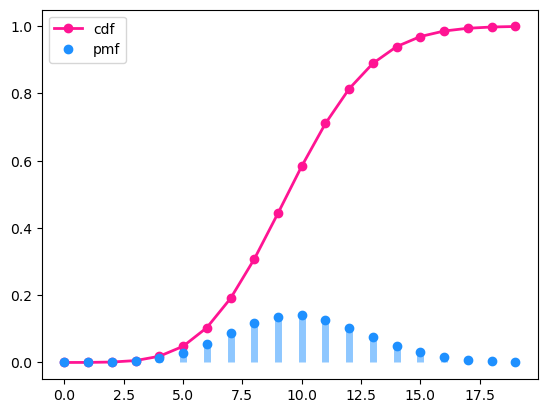

In [3]:
# calculate moments of a binomial distribution

from scipy.stats import binom

# define the parameters of the distribution
λ = 0.2      #  0 <= λ <= 1
T = 50

# calculate moments
Mean, Var, Skew, Kurt = binom.stats(T, λ, moments='mvsk');  SD=Var**0.5
print('\nMean=%.3f, SD=%.3f, Skew=%.3f, Kurt=%.3f' % (Mean, SD, Skew, Kurt))

# effective range
N = range( max(0,int(Mean-3*SD-1)), int(Mean+3*SD+1)+1, 1 ) 

# calculate the probability of n successes (pmf)
PMF = binom(T, λ).pmf(N) 
# calculate the probability of <=n successes (cdf)
CDF = binom(T, λ).cdf(N)

# plot the geometry pmf & cdf
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(   N,    CDF, color='deeppink'  , marker='o', label='cdf', linewidth=2 )
ax.plot(   N,    PMF, color='dodgerblue', marker='o', label='pmf', linewidth=0 )
ax.vlines( N, 0, PMF, color='dodgerblue',     lw=5  , alpha=0.5   )
plt.legend(); plt.show()

In [4]:
# Solvers 
k = 9

# Probability of having  exactly k  successes: (calculate pmf)
prob =   binom(T,λ).pmf(k);   prob=np.round(prob*100,1);  print('Prob(  # Successes  =',k,' ) = ',prob,'%')

# Probability of having     <k      successes: (calculate cdf)
prob =   binom(T,λ).cdf(k-1); prob=np.round(prob*100,1);  print('Prob(  # Successes < ',k,' ) = ',prob,'%')

# Probability of having     <=k     successes: (calculate cdf)
prob =   binom(T,λ).cdf(k);   prob=np.round(prob*100,1);  print('Prob(  # Successes <=',k,' ) = ',prob,'%')

# Probability of having     >k      successes: (calculate cdf)
prob = 1-binom(T,λ).cdf(k);   prob=np.round(prob*100,1);  print('Prob(  # Successes > ',k,' ) = ',prob,'%')

# Probability of having     >=k     successes: (calculate cdf)
prob = 1-binom(T,λ).cdf(k-1); prob=np.round(prob*100,1);  print('Prob(  # Successes >=',k,' ) = ',prob,'%')

Prob(  # Successes  = 9  ) =  13.6 %
Prob(  # Successes <  9  ) =  30.7 %
Prob(  # Successes <= 9  ) =  44.4 %
Prob(  # Successes >  9  ) =  55.6 %
Prob(  # Successes >= 9  ) =  69.3 %


#####   

# Multinoulli Distribution (Categorical Distribution)
** **
 - A **Discrete** Probability Distribution
 - covers the case where an event will have one of K possible outcomes: x in {1, 2, 3, …, K}
 - A generalization of the Bernoulli distribution (K=2).
** **
 - A common example that follows a Multinoulli distribution is:
   - A single roll of a die that will have an outcome in {1, 2, 3, 4, 5, 6}, e.g. K=6.
   - the probabilities for each value would be 1/6, or about 0.166 or about 16.6%.

 - A common example of a Multinoulli distribution in machine learning might be:
   - a multi-class classification of a single example into one of K classes, 
   - e.g. one of three different species of the iris flower.
** **
 - The distribution can be summarized with 
   - K variables from p1 to pK
   - each defining the probability of a given categorical outcome from 1 to K
   - and where all probabilities sum to 1.0
     - P(x=1) = p1
     - P(x=2) = p2
     - P(x=3) = p3
     - …
     - P(x=K) = pK 





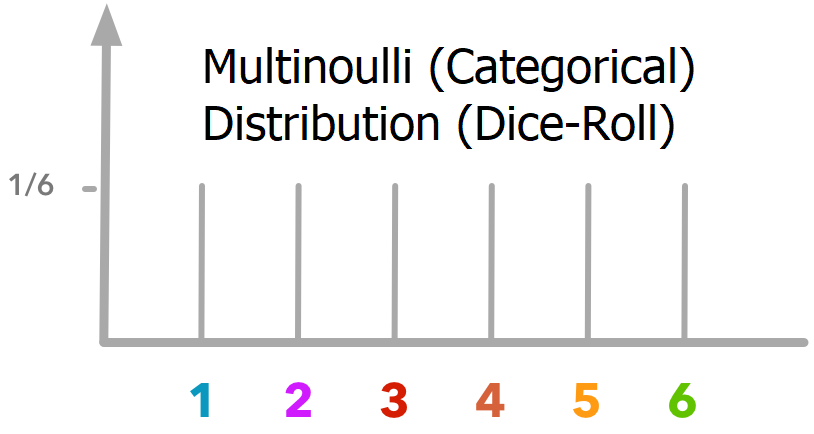

##### 
# Multinomial Distribution
** **
 - A **Discrete** Probability Distribution
** ** 
 - (delete) - A **Multinoulli Process** is the **repetition** of multiple independent **Multinoulli trials.**
 - The **repetition** of multiple independent **Multinoulli trials** will follow a **multinomial distribution.**
 ** **
 - The multinomial distribution is 
   - A generalization of the binomial distribution 
   - for a discrete variable with K outcomes.
** **   
 - A common example of the multinomial distribution is 
   - the occurrence counts of words in a text document, 
   - from the field of natural language processing.
** **   
 - A **multinomial distribution** is summarized by
   - a discrete random variable with K outcomes, 
   - a probability for each outcome from p1 to pK, 
   - and k successive trials.

In [5]:
# example of simulating a multinomial process
from numpy.random import multinomial

# define the parameters of the distribution
p = [  1.0/3.0,  1.0/3.0,  1.0/3.0  ]
k = 100

# run a single simulation
cases = multinomial(k, p)

# summarize cases
for i in range(len(cases)):
    print( 'Case %d: %d' % (i+1, cases[i]) )

Case 1: 26
Case 2: 34
Case 3: 40


In [6]:
# calculate the probability for a given number of events of each type
from scipy.stats import multinomial

# define the parameters of the distribution
p = [  1.0/3.0,  1.0/3.0,  1.0/3.0  ]
k = 100

# define the distribution
dist = multinomial(k, p)

# define a specific number of outcomes from 100 trials
cases = [ 33, 33, 34 ]

# calculate the probability for the case
pr = dist.pmf(cases)

# print as a percentage
print('Case=%s, Probability: %.3f%%' % (cases, pr*100))

Case=[33, 33, 34], Probability: 0.813%


#####   
# Gaussian Distribution
 - A **Continuous** Probability Distribution

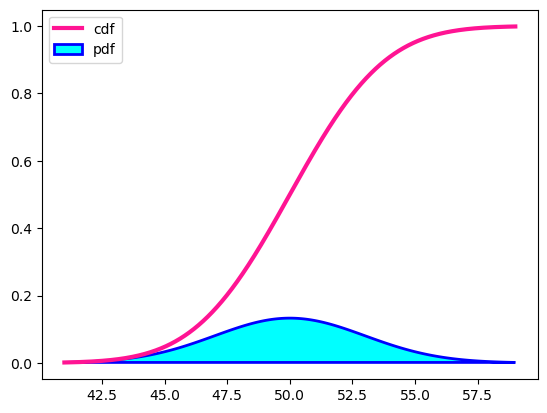

In [7]:
# Gaussian Distribution - pdf
from scipy.stats import norm

# define the distribution parameters
Mean = 50.0
SD   =  3.0

N = np.arange( int(Mean-3*SD), int(Mean+3*SD)+0.001, 0.001 )

# calculate the pdf
pdf = norm.pdf( N, Mean, SD )
# calculate the cdf
cdf = norm.cdf( N, Mean, SD )

# plot the gaussian pdf & cdf
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot( N, cdf, color='deeppink'  , marker=' ', label='cdf', linewidth=3 )
ax.fill( N, pdf, color='cyan', edgecolor='blue', label='pdf', linewidth=2 )
plt.legend(loc='best'); plt.show()

In [8]:
# Solvers
t_init, t_end = 41, 59

# Probability of  Arrival  be between  t_init, t_end:
prob_arrived = norm.cdf( t_end, Mean, SD ) - norm.cdf( t_init, Mean, SD ) 
prob_arrived = round( prob_arrived*100, 1 )   
print( 'Prob(         ', t_init, '< Arrival <', t_end,'         )  = ',prob_arrived, '%')

# Probability of  Time of kth success  be out of   t_init, t_end:
prob_not_arrived = round( 100-prob_arrived, 1 )
print( 'Prob(  Arrival<'+str(t_init), '    or     ', str(t_end)+'>Arrival  )  = ',prob_not_arrived, '%')

Prob(          41 < Arrival < 59          )  =  99.7 %
Prob(  Arrival<41     or      59>Arrival  )  =  0.3 %


#####   

# Geometry Distribution
 - A **Discrete** Probability Distribution
 - Time of 1st arrival
   - with arrival rate of ρ (scaled from 0 to 1 )
 - pmf( k ) = ρ * (1-ρ)^(k-1)   for k>=1
 - E[ k ] = 1/ρ
 - Var[ k ] = (1-ρ) / (ρ^2)


Mean=4.000, SD=3.464, Skew=2.021, Kurt=6.083


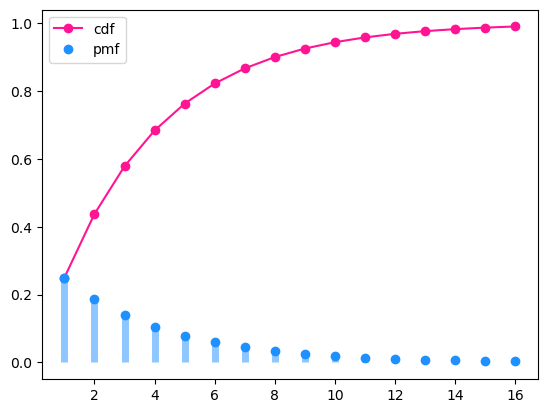

In [9]:
# Geometry Distribution 
from scipy.stats import geom

# define the parameters of the distribution
ρ = 0.25    # 0 < ρ < 1

# calculate moments
Mean, Var, Skew, Kurt = geom.stats( ρ, moments='mvsk' );  SD=Var**0.5
print('\nMean=%.3f, SD=%.3f, Skew=%.3f, Kurt=%.3f' % (Mean, SD, Skew, Kurt))
 
# sample space
N = np.arange( geom.ppf(0.01,ρ), geom.ppf(0.99,ρ) )

# calculate the pmf
pmf = geom.pmf( N, ρ )
# calculate the cdf
cdf = geom.cdf( N, ρ )

# plot the geometry pmf & cdf 
fig, ax = plt.subplots()
ax.plot(   N,    cdf, color='deeppink'  , marker='o', label='cdf' )
ax.plot(   N,    pmf, color='dodgerblue', marker='o', label='pmf', linewidth=0 )
ax.vlines( N, 0, pmf, color='dodgerblue',     lw=5  , alpha=0.5   )
plt.legend(); plt.show()

In [10]:
# Solvers 
k = 7

# Probability of having  exactly k  successes: (calculate pmf)
prob =   geom.pmf( k  , ρ );  prob=np.round(prob*100,1);  print('Prob(  T1  =',k,' ) = ',prob,'%')

# Probability of having     <k      successes: (calculate cdf)
prob =   geom.cdf( k-1, ρ );  prob=np.round(prob*100,1);  print('Prob(  T1 < ',k,' ) = ',prob,'%')

# Probability of having     <=k     successes: (calculate cdf)
prob =   geom.cdf( k  , ρ );  prob=np.round(prob*100,1);  print('Prob(  T1 <=',k,' ) = ',prob,'%')

# Probability of having     >k      successes: (calculate cdf)
prob = 1-geom.cdf( k  , ρ ); prob=np.round(prob*100,1);  print('Prob(  T1 > ',k,' ) = ',prob,'%')

# Probability of having     >=k     successes: (calculate cdf)
prob = 1-geom.cdf( k-1, ρ );  prob=np.round(prob*100,1);  print('Prob(  T1 >=',k,' ) = ',prob,'%')

Prob(  T1  = 7  ) =  4.4 %
Prob(  T1 <  7  ) =  82.2 %
Prob(  T1 <= 7  ) =  86.7 %
Prob(  T1 >  7  ) =  13.3 %
Prob(  T1 >= 7  ) =  17.8 %


#####   

# Poisson Distribution
 - A **Discrete** Probability Distribution
 - model of **market shocks**
 - Probability of k arrivals
   - between [0,τ] 
   - with arrival rate of λ
 - μ = λ*τ
 - pmf(k) = (1/k!)*(μ^k)*exp(-μ) for k>=0

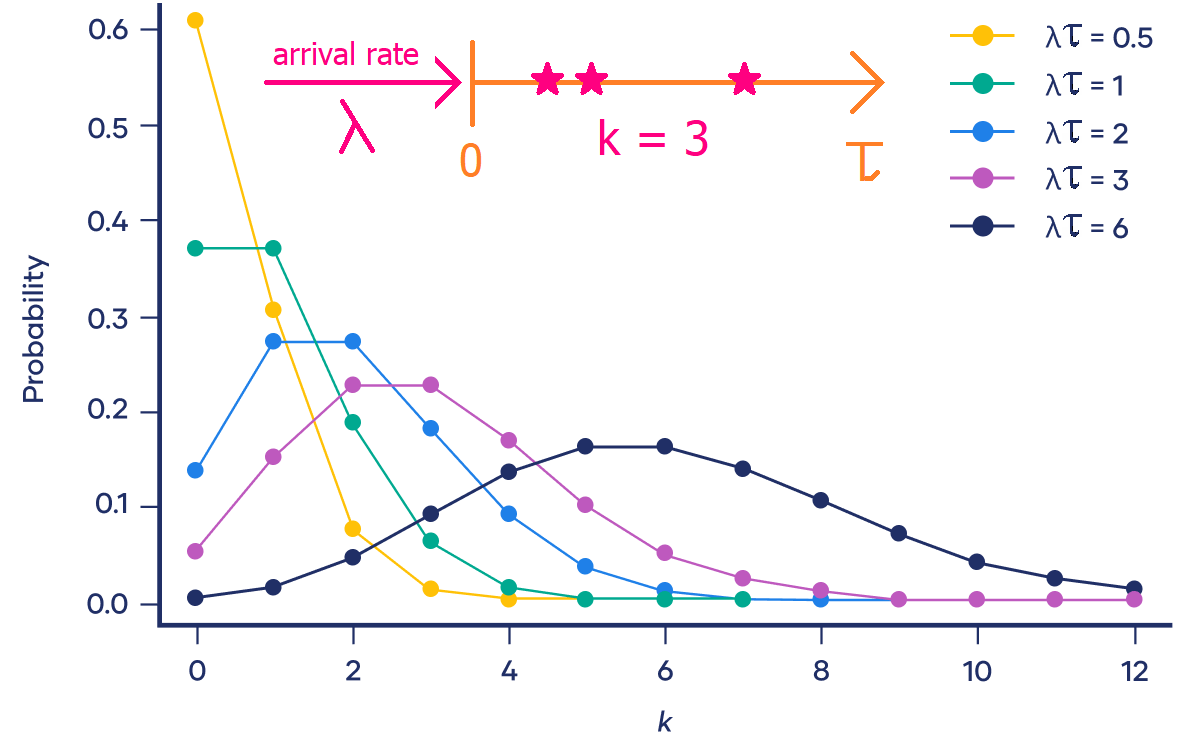


Mean=4.800, SD=2.191, Skew=0.456, Kurt=0.208


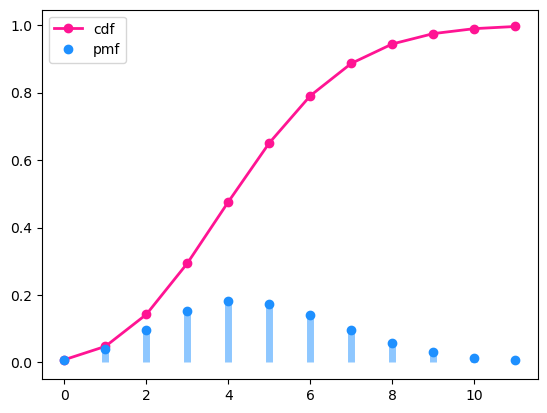

In [11]:
# Poisson Distribution 
from scipy.stats import poisson 

# define the parameters of the distribution
λ = 1.6
τ = 3
μ = λ*τ

# calculate moments
Mean, Var, Skew, Kurt = poisson.stats( μ , moments='mvsk')
SD = Var**0.5
print('\nMean=%.3f, SD=%.3f, Skew=%.3f, Kurt=%.3f' % (Mean, SD, Skew, Kurt))

# sample space
N = np.arange(poisson.ppf(0.003, μ),
              poisson.ppf(0.997, μ))

# calculate the pmf
pmf = poisson.pmf(N, μ)
# calculate the cdf
cdf = poisson.cdf(N, μ)

# plot the geometry pmf & cdf
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(   N,    cdf, color='deeppink'  , marker='o', label='cdf', linewidth=2 )
ax.plot(   N,    pmf, color='dodgerblue', marker='o', label='pmf', linewidth=0 )
ax.vlines( N, 0, pmf, color='dodgerblue',     lw=5  , alpha=0.5   )
plt.legend(); plt.show()

In [12]:
# Solvers 
k = 4

# Probability of having  exactly k  successes: (calculate pmf)
prob =   poisson.pmf( k, μ );   prob=np.round(prob*100,1);  print('Prob(  # Successes  =',k,' ) = ',prob,'%')

# Probability of having     <k      successes: (calculate cdf)
prob =   poisson.cdf( k-1, μ ); prob=np.round(prob*100,1);  print('Prob(  # Successes < ',k,' ) = ',prob,'%')

# Probability of having     <=k     successes: (calculate cdf)
prob =   poisson.cdf( k, μ );   prob=np.round(prob*100,1);  print('Prob(  # Successes <=',k,' ) = ',prob,'%')

# Probability of having     >k      successes: (calculate cdf)
prob = 1-poisson.cdf( k, μ );   prob=np.round(prob*100,1);  print('Prob(  # Successes > ',k,' ) = ',prob,'%')

# Probability of having     >=k     successes: (calculate cdf)
prob = 1-poisson.cdf( k-1, μ ); prob=np.round(prob*100,1);  print('Prob(  # Successes >=',k,' ) = ',prob,'%')

Prob(  # Successes  = 4  ) =  18.2 %
Prob(  # Successes <  4  ) =  29.4 %
Prob(  # Successes <= 4  ) =  47.6 %
Prob(  # Successes >  4  ) =  52.4 %
Prob(  # Successes >= 4  ) =  70.6 %


#####   

# Erlang Distribution (Order k)
 - A **Continuous** Probability Distribution
 - model of **market shocks**
 - Time of k successes
   - with arrival rate of λ

C:\Users\EZ-Tech\AppData\Local\Temp\ipykernel_1724\2313729519.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('\nMean=%.3f, SD=%.3f, Skew=%.3f, Kurt=%.3f' % (Mean, SD, Skew, Kurt))



Mean=0.345, SD=0.345, Skew=1.792, Kurt=2.479


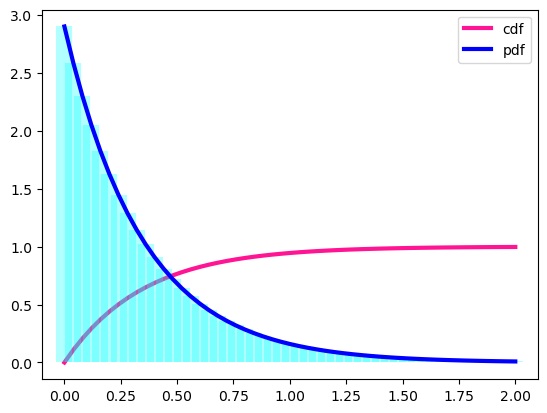

In [13]:
# Erlang Distribution 
from sympy import *

t = symbols('t')
k = 1           # kth arrival
λ = 2.9         # arival rate

Mean = k/λ
Var  = k/λ/λ
SD   = Var**.5

From     = max( int(Mean-3*SD-1.), 0 )
To       =      int(Mean+3*SD+1.) 
Step     = (To - From)/50
N        = np.arange( From, To+ 0.001, Step )

Erlang   = (λ**k) * (t**(k-1)) * (exp(-λ*t)) / factorial(k-1)
PDF, CDF = [], []
for n in N:
    PDF.append( Erlang.subs(t,n) )
    CDF.append( integrate(Erlang,(t,0,n)) ) 

Skew = pd.DataFrame(PDF).skew()
Kurt = pd.DataFrame(PDF).kurt()
print('\nMean=%.3f, SD=%.3f, Skew=%.3f, Kurt=%.3f' % (Mean, SD, Skew, Kurt))

# plot the geometry pmf & cdf
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(   N,    CDF, color='deeppink', marker=' ', label='cdf', linewidth=3 ) 
if k > 1:
    ax.fill(   N,    PDF, color='cyan', edgecolor='blue', label='pdf', linewidth=2, alpha=0.5 )  
else:
    ax.vlines( N, 0, PDF, color='cyan', lw=2*(To-From)*λ  , alpha=0.3   )
    ax.plot(   N,    PDF, color='blue', marker=' ', label='pdf', linewidth=3 )
    
plt.legend(loc='best'); plt.show()

In [14]:
# Solvers
t_init, t_end = 0.5, 1.1

# Probability of  Time of kth Arrival  be between  t_init, t_end:
prob_arrived = integrate(Erlang,(t,t_init,t_end))  
prob_arrived = round( prob_arrived*100, 1 )   
print( 'Prob(    ', t_init, '< T'+str(k)+' <', t_end,'    )  = ',prob_arrived, '%')

# Probability of  Time of kth Arrival  be out of   t_init, t_end:
prob_not_arrived = 100-prob_arrived
print( 'Prob(  T'+str(k)+'<'+str(t_init), '  or  ', str(t_end)+'>T'+str(k),' )  = ',prob_not_arrived, '%')

Prob(     0.5 < T1 < 1.1     )  =  19.3 %
Prob(  T1<0.5   or   1.1>T1  )  =  80.7 %


#####   

# Exponential Distribution
 - A **Continuous** Probability Distribution
 - Time of 1st arrival
   - with arrival rate of λ
 - pdf( t ) = λ * exp(-λt)    
 - E[ T1 ] = 1/λ
 - Var[ T1 ] = 1/λ/λ
 - Prob( T1 <= a ) = 1-exp(-λa)
 - Prob( a <= T1 ) = exp(-λa)

C:\Users\EZ-Tech\AppData\Local\Temp\ipykernel_1724\2334050194.py:25: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print('\nMean=%.3f, SD=%.3f, Skew=%.3f, Kurt=%.3f' % (Mean, SD, Skew, Kurt))



Mean=2.000, SD=2.000, Skew=1.464, Kurt=1.252


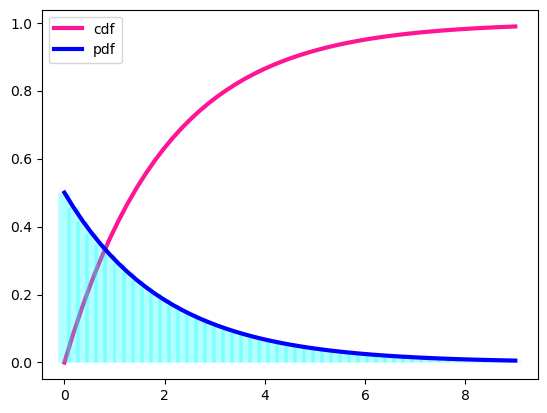

In [15]:
# Exponential Distribution  ==  Erlang( T1 )
from sympy import *

t = symbols('t')
k = 1           # always k=1
λ = 0.5         # arival rate

Mean = k/λ
Var  = k/λ/λ
SD   = Var**.5

From     = max( int(Mean-3*SD-1.), 0 )
To       =      int(Mean+3*SD+1.) 
Step     = (To - From)/50
N        = np.arange( From, To+ 0.001, Step )

Exponential = (λ**k) * (t**(k-1)) * (exp(-λ*t)) / factorial(k-1)
PDF, CDF = [], []
for n in N:
    PDF.append( Exponential.subs(t,n) )
    CDF.append( integrate(Exponential,(t,0,n)) ) 

Skew = pd.DataFrame(PDF).skew()
Kurt = pd.DataFrame(PDF).kurt()
print('\nMean=%.3f, SD=%.3f, Skew=%.3f, Kurt=%.3f' % (Mean, SD, Skew, Kurt))

# plot the geometry pmf & cdf
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(   N,    CDF, color='deeppink', marker=' ', label='cdf', linewidth=3 ) 
if k > 1:
    ax.fill(   N,    PDF, color='cyan', edgecolor='blue', label='pdf', linewidth=2, alpha=0.5 )  
else:
    ax.vlines( N, 0, PDF, color='cyan', lw=2*(To-From)*λ  , alpha=0.3   )
    ax.plot(   N,    PDF, color='blue', marker=' ', label='pdf', linewidth=3 )
    
plt.legend(loc='best'); plt.show()

In [16]:
# Solvers
t_init, t_end = 0.5, 1.1

# Probability of  Time of 1st Arrival  be between  t_init, t_end:
prob_arrived = integrate(Exponential,(t,t_init,t_end))  
prob_arrived = round( prob_arrived*100, 1 )   
print( 'Prob(    ', t_init, '< T'+str(k)+' <', t_end,'    )  = ',prob_arrived, '%')

# Probability of  Time of 1st Arrival  be out of   t_init, t_end:
prob_not_arrived = 100-prob_arrived
print( 'Prob(  T'+str(k)+'<'+str(t_init), '  or  ', str(t_end)+'>T'+str(k),' )  = ',prob_not_arrived, '%')

Prob(     0.5 < T1 < 1.1     )  =  20.2 %
Prob(  T1<0.5   or   1.1>T1  )  =  79.8 %


#####   

#####   